In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import requests

In [ ]:
# Base URL without the offset parameter
base_url = 'https://www.booking.com/searchresults.en-gb.html?ss=New+Delhi&ssne=New+Delhi&ssne_untouched=New+Delhi&efdco=1&label=gen173nr-1FCAEoggI46AdIM1gEaGyIAQGYAQm4ARfIAQzYAQHoAQH4AQOIAgGoAgO4At-xprMGwAIB0gIkZDRlNGZjMTktZjY0OS00N2Q3LTkwMTItOTZhMDY2ODU3NGRl2AIG4AIB&aid=304142&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2106102&dest_type=city&checkin=2024-09-27&checkout=2024-10-23&group_adults=2&no_rooms=1&group_children=0'

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

In [ ]:
hotel_results = []

# Loop through pages 1 to 40
for page_number in range(0, 250,25):
    url = base_url.format(page_number)

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    #Removed extra indent from this line
    for el in soup.find_all("div", {"data-testid": "property-card"}):
        # Extract rating, handling cases where it's not present
        rating_element = el.find("div", {"data-testid": "review-score"})
        rating = rating_element.text.strip().split(" ")[0] if rating_element else "N/A"  # Handle missing ratings

        # Extract description, handling cases where it's not present
        description_element = el.find('div', {'data-testid': 'recommended-units'})
        description = description_element.text.strip() if description_element else "N/A"

        hotel_results.append({
            "name": el.find("div", {"data-testid": "title"}).text.strip(),
            'description': description,  # Use extracted or default description
            "location": el.find("span", {"data-testid": "address"}).text.strip(),
            "pricing": el.find("span", {"data-testid": "price-and-discounted-price"}).text.strip(),
            "rating": rating  # Use the extracted or default rating
        })


# Create DataFrame from the collected results
hotels = pd.DataFrame(hotel_results)

In [ ]:
hotels.head()

,name,description,location,pricing,rating
0,Hotel The Tark Near IGI Airport,Deluxe Double Room1 queen bedBreakfast include...,New Delhi,$251,Scored
1,Hotel Caves Plaza Near IGI Airport,Deluxe Double Room1 queen bedBreakfast include...,New Delhi,$301,Scored
2,Hotel Le Mount Plaza,Deluxe Double Room1 queen bedBreakfast include...,New Delhi,$376,Scored
3,Hotel Caves INN By Raj Near IGI Airport Delhi,Deluxe Double Room1 queen bedBreakfast include...,New Delhi,$301,Scored
4,Hotel Ramida Suites At Delhi Airport,Superior Double Room1 king bedFree cancellatio...,"Aerocity, New Delhi",$293,Scored


In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         250 non-null    object
 1   description  250 non-null    object
 2   location     250 non-null    object
 3   pricing      250 non-null    object
 4   rating       250 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
hotels['pricing'] = hotels['pricing'].str.replace('[$,US\xa0]', '', regex=True).astype(float) #Remove '$' from the regex
hotels['rating'] = hotels['rating'].str.extract('(\d+\.\d+)')
# Convert the 'rating' column to numeric
hotels['rating'] = pd.to_numeric(hotels['rating'], errors='coerce')

In [ ]:

# Drop rows with missing values in the 'rating' column
hotels.dropna(subset=['rating'],inplace=True)

In [ ]:
# Descriptive statistics
print(hotels.describe())

# Unique values and value counts
print(hotels['location'].value_counts())

       pricing  rating
count      0.0     0.0
mean       NaN     NaN
std        NaN     NaN
min        NaN     NaN
25%        NaN     NaN
50%        NaN     NaN
75%        NaN     NaN
max        NaN     NaN
Series([], Name: count, dtype: int64)


In [ ]:
# Correlation matrix
correlation_matrix = hotels.corr()
print(correlation_matrix)

             name  description  location  pricing  rating
name          NaN          NaN       NaN      NaN     NaN
description   NaN          NaN       NaN      NaN     NaN
location      NaN          NaN       NaN      NaN     NaN
pricing       NaN          NaN       NaN      NaN     NaN
rating        NaN          NaN       NaN      NaN     NaN


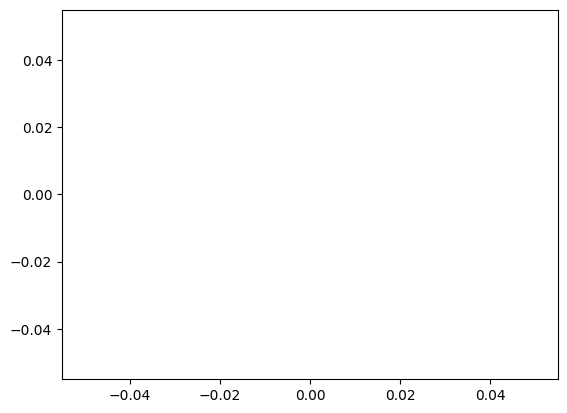

In [ ]:
# Distribution plot for pricing
sns.histplot(hotels['pricing'], kde=True)
plt.show()

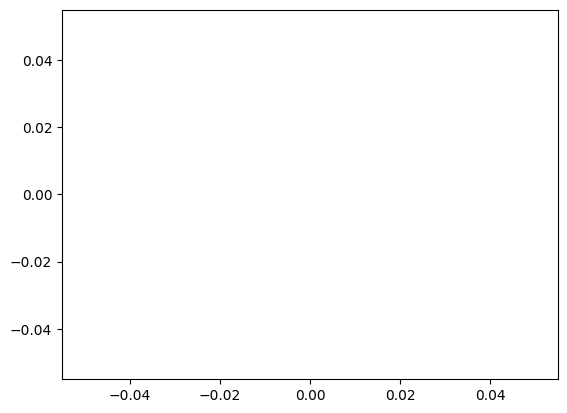

In [ ]:
# Scatter plot for rating vs pricing
sns.scatterplot(data=hotels, x='rating', y='pricing')
plt.show()

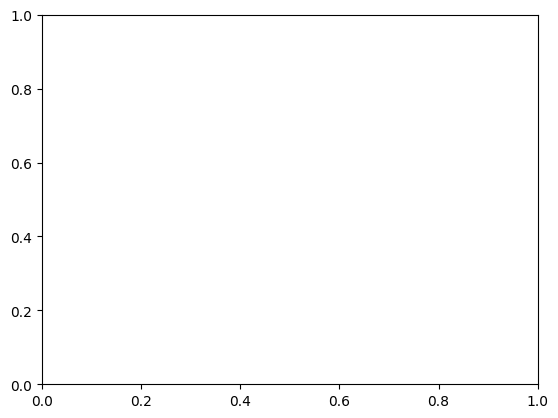

In [ ]:
# Box plot for 'pricing'
sns.boxplot(x=hotels['pricing'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Sample DataFrame (Replace with your actual DataFrame)
hotels = pd.DataFrame({
    'rating': [4.5, 3.8, 4.0, 5.0, 2.5],  # Example data
    'pricing': [200, 150, 180, 250, 120]  # Example data
})

# Convert 'pricing' to numeric if needed
# hotels['pricing'] = hotels['pricing'].replace('[\$,]', '', regex=True).astype(float)

# Handle missing values if any
hotels = hotels.dropna(subset=['rating', 'pricing'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hotels[['rating']], hotels['pricing'], test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 772.0459183673465
R-squared: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
Q1 = hotels['pricing'].quantile(0.25)
Q3 = hotels['pricing'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

count_outliers = hotels[(hotels['pricing'] < lower_bound) | (hotels['pricing'] > upper_bound)].shape[0]

print(f'Number of outliers in pricing: {count_outliers}')

Number of outliers in pricing: 0


In [ ]:
Q1 = hotels['pricing'].quantile(0.25)
Q3 = hotels['pricing'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = hotels[(hotels['pricing'] < lower_bound) | (hotels['pricing'] > upper_bound)]
# Remove outliers
hotels_no_outliers = hotels[(hotels['pricing'] >= lower_bound) & (hotels['pricing'] <= upper_bound)]

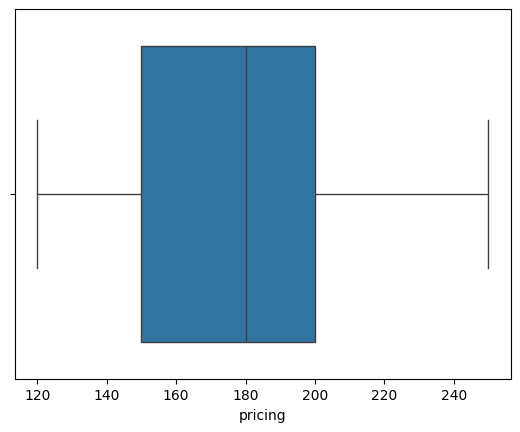

In [ ]:
# Box plot for 'pricing'
sns.boxplot(x=hotels_no_outliers['pricing'])
plt.show()

In [ ]:
# Prepare the data
X = hotels_no_outliers[['rating']]
y = hotels_no_outliers['pricing']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)
    results[model_name] = {'MSE': mse, 'R-squared': r_squared}

# Print the results
for model_name, scores in results.items():
    print(f"{model_name} - MSE: {scores['MSE']}, R-squared: {scores['R-squared']}")

# Choose the best model based on MSE or R-squared (based on preference)
best_model = min(results, key=lambda k: results[k]['MSE'])
print(f"\nBest Model based on MSE: {best_model}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Linear Regression - MSE: 772.0459183673465, R-squared: nan
Decision Tree Regressor - MSE: 900.0, R-squared: nan
Random Forest Regressor - MSE: 1592.0100000000004, R-squared: nan
Gradient Boosting Regressor - MSE: 900.0119526691851, R-squared: nan

Best Model based on MSE: Linear Regression


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
!pip install xlsxwriter
import pandas as pd
import xlsxwriter

# Sample DataFrame
hotels = pd.DataFrame({
    'name': ['Hotel A', 'Hotel B', 'Hotel C'],
    'location': ['City A', 'City B', 'City C'],
    'rating': [4.5, 3.8, 4.2],
    'pricing': [200, 150, 180]
})

# Define the file name
file_name = 'hotels_data_custom_format.xlsx'

# Save DataFrame to Excel with custom formatting
with pd.ExcelWriter(file_name, engine='xlsxwriter') as writer:
    hotels.to_excel(writer, sheet_name='Hotels', index=False)
    workbook  = writer.book
    worksheet = writer.sheets['Hotels']

    # Example formatting
    format1 = workbook.add_format({'num_format': '$#,##0.00'})
    worksheet.set_column('D:D', 18, format1)  # Format the 'pricing' column

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.9 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>